<a href="https://colab.research.google.com/github/fabiodemo/Tensorflow-Developer-Certificate/blob/main/Computer%20VIsion%20and%20Convolutional%20Neural%20Networks/Introduction_to_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer Vision
Is a field of artificial intelligence that enables computers to derive meaningful information from digital images, videos, and other visual inputs. It involves the use of deep learning algorithms to identify, classify, and interpret objects, scenes, and activities in visual data.

TensorFlow is a powerful open-source machine learning library developed by Google. It provides a comprehensive set of tools and APIs for building and training deep learning models, including for computer vision tasks.

By leveraging the capabilities of TensorFlow, computer vision applications can achieve remarkable accuracy and performance in various domains. Here are some key aspects of computer vision with TensorFlow:

**Image Classification:** TensorFlow enables the development of image classification models that can identify and label objects within images. This finds applications in areas such as object detection, product recognition, and image search.

**Object Detection:** Computer vision models built with TensorFlow can detect and localize objects in images and videos. This is useful for tasks like tracking objects, counting items, and analyzing video footage.

**Scene Understanding:** TensorFlow allows for the creation of models that can understand the context and relationships between objects in a scene. This enables applications like scene classification, activity recognition, and image captioning.

**Medical Imaging:** TensorFlow is widely used in medical imaging for tasks such as disease diagnosis, organ segmentation, and treatment planning. It helps medical professionals make informed decisions based on visual data.

**Self-Driving Cars:** Computer vision with TensorFlow plays a crucial role in the development of self-driving cars. It enables vehicles to perceive their surroundings, detect obstacles, and make safe driving decisions.

**Robotics:** TensorFlow-based computer vision models empower robots to navigate their environment, recognize objects, and interact with the world around them.

TensorFlow's flexibility and scalability make it an ideal choice for developing computer vision applications. Its extensive ecosystem of tools and resources, including pre-trained models, tutorials, and documentation, further simplifies the development process.

Overall, computer vision with TensorFlow offers a powerful combination for extracting valuable insights from visual data across a wide range of applications.

## Get the data
Getting the data from Food 101 dataset

In [7]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2024-01-27 01:51:22--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 142.250.101.207, 2607:f8b0:4023:c0d::cf
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M   284MB/s    in 0.4s    

2024-01-27 01:51:22 (284 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



In [8]:
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

## Inspect the data

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [ ]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.


In [ ]:
# Another way to find out how many images in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

In [ ]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Create a list of class_names from the subdirectories
print(f"{class_names} in {data_dir}")

['pizza' 'steak'] in pizza_steak/train


In [ ]:
# Visualize the images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"image shape: {img.shape}")

  return img

['1392718.jpg']
image shape: (512, 512, 3)


array([[[ 6,  2,  0],
        [ 7,  3,  0],
        [ 7,  3,  0],
        ...,
        [ 4,  3,  1],
        [ 4,  3,  1],
        [ 4,  3,  1]],

       [[ 7,  3,  0],
        [ 8,  4,  1],
        [ 8,  4,  1],
        ...,
        [ 4,  3,  1],
        [ 4,  3,  1],
        [ 5,  4,  2]],

       [[ 7,  3,  0],
        [ 8,  4,  1],
        [ 8,  4,  1],
        ...,
        [ 5,  4,  2],
        [ 5,  4,  2],
        [ 5,  4,  2]],

       ...,

       [[65, 27,  4],
        [65, 27,  4],
        [64, 26,  5],
        ...,
        [50, 23,  2],
        [51, 24,  3],
        [52, 25,  4]],

       [[68, 27,  5],
        [67, 26,  4],
        [65, 27,  4],
        ...,
        [49, 24,  2],
        [49, 24,  2],
        [49, 24,  2]],

       [[69, 28,  6],
        [68, 27,  5],
        [65, 27,  4],
        ...,
        [53, 28,  6],
        [52, 27,  5],
        [51, 26,  4]]], dtype=uint8)

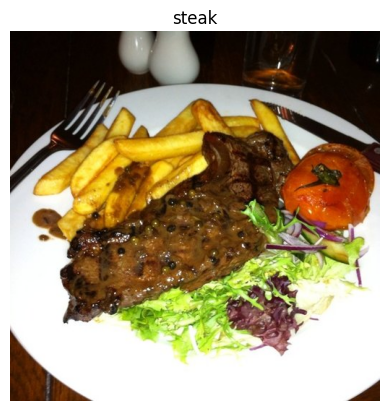

In [ ]:
view_random_image(target_dir="pizza_steak/train/",
                  target_class="steak")

['1026922.jpg']
image shape: (306, 512, 3)


array([[[ 73,  54,  37],
        [ 77,  58,  41],
        [ 78,  57,  38],
        ...,
        [105,  77,  66],
        [ 97,  68,  60],
        [ 95,  66,  60]],

       [[ 86,  67,  50],
        [ 78,  60,  40],
        [ 79,  58,  39],
        ...,
        [102,  74,  62],
        [ 95,  66,  58],
        [ 94,  65,  57]],

       [[114,  93,  74],
        [ 85,  64,  43],
        [ 69,  47,  26],
        ...,
        [102,  74,  62],
        [ 96,  69,  58],
        [ 96,  69,  58]],

       ...,

       [[178, 137, 109],
        [179, 138, 110],
        [181, 140, 110],
        ...,
        [123,  94,  62],
        [112,  83,  51],
        [114,  85,  53]],

       [[183, 144, 115],
        [187, 148, 119],
        [171, 132, 101],
        ...,
        [127, 100,  70],
        [117,  91,  58],
        [125,  99,  66]],

       [[171, 134, 105],
        [170, 133, 104],
        [147, 111,  79],
        ...,
        [131, 104,  74],
        [115,  91,  57],
        [116,  92,  58]]

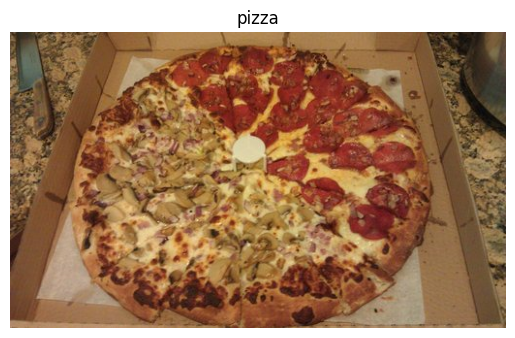

In [ ]:
view_random_image(target_dir="pizza_steak/train/",
                  target_class="pizza")

['1008104.jpg']
image shape: (384, 512, 3)


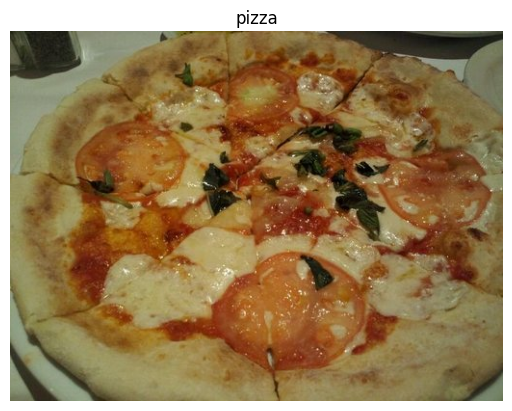

In [ ]:
import tensorflow as tf
img = view_random_image(target_dir="pizza_steak/train/",
                  target_class="pizza")

In [ ]:
tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[ 38,  41,  22],
        [ 34,  37,  18],
        [ 41,  44,  25],
        ...,
        [ 68,  72,  57],
        [ 63,  67,  52],
        [ 58,  62,  47]],

       [[ 37,  40,  21],
        [ 32,  35,  16],
        [ 36,  39,  20],
        ...,
        [ 65,  69,  54],
        [ 62,  66,  51],
        [ 59,  63,  48]],

       [[ 41,  44,  25],
        [ 37,  40,  21],
        [ 37,  40,  21],
        ...,
        [ 52,  56,  42],
        [ 49,  53,  39],
        [ 48,  52,  38]],

       ...,

       [[109, 114,  84],
        [110, 115,  85],
        [110, 115,  85],
        ...,
        [108, 123,  92],
        [106, 120,  87],
        [104, 118,  85]],

       [[110, 115,  85],
        [111, 116,  86],
        [111, 116,  86],
        ...,
        [105, 120,  87],
        [104, 118,  85],
        [101, 115,  82]],

       [[108, 113,  83],
        [109, 114,  84],
        [110, 115,  85],
        ...,
        [104, 119,  8

In [ ]:
img.shape

(384, 512, 3)

In [ ]:
# Get all the pixel values between 0 & 1
img/255.

array([[[0.14901961, 0.16078431, 0.08627451],
        [0.13333333, 0.14509804, 0.07058824],
        [0.16078431, 0.17254902, 0.09803922],
        ...,
        [0.26666667, 0.28235294, 0.22352941],
        [0.24705882, 0.2627451 , 0.20392157],
        [0.22745098, 0.24313725, 0.18431373]],

       [[0.14509804, 0.15686275, 0.08235294],
        [0.1254902 , 0.1372549 , 0.0627451 ],
        [0.14117647, 0.15294118, 0.07843137],
        ...,
        [0.25490196, 0.27058824, 0.21176471],
        [0.24313725, 0.25882353, 0.2       ],
        [0.23137255, 0.24705882, 0.18823529]],

       [[0.16078431, 0.17254902, 0.09803922],
        [0.14509804, 0.15686275, 0.08235294],
        [0.14509804, 0.15686275, 0.08235294],
        ...,
        [0.20392157, 0.21960784, 0.16470588],
        [0.19215686, 0.20784314, 0.15294118],
        [0.18823529, 0.20392157, 0.14901961]],

       ...,

       [[0.42745098, 0.44705882, 0.32941176],
        [0.43137255, 0.45098039, 0.33333333],
        [0.43137255, 0

## An end-to-end example

Convolutional neural network to find patterns in our images.

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# Setup paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

# Preprocess data (scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)


# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model (same as the Tiny VGG)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 8s 136ms/step - loss: 0.5435 - accuracy: 0.7213 - val_loss: 0.4111 - val_accuracy: 0.8160
Epoch 2/5
47/47 [==============================] - 6s 120ms/step - loss: 0.4225 - accuracy: 0.8113 - val_loss: 0.3499 - val_accuracy: 0.8580
Epoch 3/5
47/47 [==============================] - 6s 130ms/step - loss: 0.3922 - accuracy: 0.8233 - val_loss: 0.3433 - val_accuracy: 0.8620
Epoch 4/5
47/47 [==============================] - 6s 132ms/step - loss: 0.3721 - accuracy: 0.8300 - val_loss: 0.3556 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 6s 135ms/step - loss: 0.3353 - accuracy: 0.8587 - val_loss: 0.3454 - val_accuracy: 0.8520


In [5]:
len(train_data)

47

In [6]:
# 1500 images and 32 is the batch size
1500/32

46.875

In [10]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 110, 110, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_7 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                 